In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             # 日月光华QQ ： 2774881979

In [3]:
torch.__version__

'1.12.1'

In [4]:
data = pd.read_csv('./datasets/Income1.csv')

FileNotFoundError: [Errno 2] No such file or directory: './datasets/Income1.csv'

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [ ]:
X = torch.from_numpy(data.Education.values.reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1, 1)).type(torch.FloatTensor)

In [5]:
X.shape, Y.shape

NameError: name 'X' is not defined

In [6]:
from torch import nn

In [7]:
# 必须继承自 nn.Module 实现两个方法 __init__  forward

In [8]:
class EIModel(nn.Module):
    def __init__(self):
        super(EIModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    def forward(self, inputs):
        logits = self.linear(inputs)
        return logits

In [9]:
#均方损失误差
model = EIModel()

In [10]:
model

EIModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
loss_fn = nn.MSELoss()
list(model.parameters())

[Parameter containing:
 tensor([[-0.8764]], requires_grad=True),
 Parameter containing:
 tensor([0.0776], requires_grad=True)]

In [24]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001)

In [25]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        #梯度清零
        opt.zero_grad()
        #反向传播
        loss.backward()
        #优化参数
        opt.step()

In [27]:
list(model.parameters())

[Parameter containing:
 tensor([[4.9781]], requires_grad=True),
 Parameter containing:
 tensor([-28.4347], requires_grad=True)]

In [30]:
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[4.9781]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-28.4347], requires_grad=True))]

In [33]:
model.linear.weight, model.linear.bias

(Parameter containing:
 tensor([[4.9781]], requires_grad=True),
 Parameter containing:
 tensor([-28.4347], requires_grad=True))

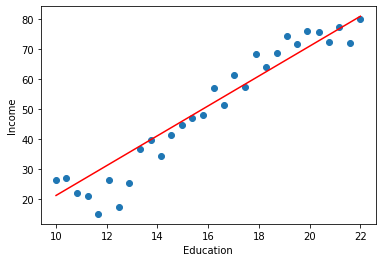

In [35]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

plt.plot(X, model(X).detach().numpy(), c='r')

In [ ]:
1.输入数据处理
2.创建模型
3.训练
4.预测、评价